# Mini-Project I
During this project, we will practice handling of complex lists and dictionaries in Python. Plus, we will learn how to work with API documentation. Don't be afraid to search for the information in the [**documentation**](https://api.tfl.gov.uk/swagger/ui/index.html?url=/swagger/docs/v1#!/AccidentStats/AccidentStats_Get).

Let's go to the tasks, we have some parsing to do :)!!

In [75]:
import requests as re
import os

In [76]:
#General endpoint we are reaching
root_endpoint = 'https://api-nile.tfl.gov.uk/'


In [77]:
def airQuality():
    api_method = 'AirQuality' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
            
    return result['currentForecast'][0]['forecastSummary']

In [78]:
airQuality() # Task 1 - air quality predictions

'Low air pollution forecast valid from Friday 11 February to end of Friday 11 February GMT'

## Task
What are the different modes of transport which are operated by Transfer for London? How many of modes do they have?

Print the list with different modes of transport, plus their count. Example output:
```
[bus, cable-car,.....]
Number of different modes of transport is: xyz
```

We need to search the documentation for correct request.

In [47]:
def modes():
    api_method = 'Line/Meta/Modes' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
       
    number_modes=[]
    for mode in range(len(result)):
        m = result[mode]['modeName']
        number_modes.append(m)
        # return mode
    
    return number_modes

In [48]:
modes()

['bus',
 'cable-car',
 'coach',
 'cycle',
 'cycle-hire',
 'dlr',
 'interchange-keep-sitting',
 'interchange-secure',
 'national-rail',
 'overground',
 'replacement-bus',
 'river-bus',
 'river-tour',
 'taxi',
 'tflrail',
 'tram',
 'tube',
 'walking']

## Task
How many BikePoints in London are operated by Transfor for London? How many docks are in **all** BikePoints? There is the information for empty and full docks for each BikePoint.

In [52]:
def bikeP():
    api_method = 'BikePoint' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
  
       
    


    return result

In [ ]:
bikes=bikeP()
len(bikes)

In [112]:
count = 0

for x in range(len(bikes)):
    count +=1

print(count)
len(bikes)

785


785

In [133]:
dock_c=[]
weirdos=[]
for bikepoint in bikes:
    properties=bikepoint['additionalProperties']
    for item in properties:
        if item['key']=='NbDocks':
            
    # if num_dock['key']=='NbDocks':
            dock_c.append(int(item['value']))
    else:
        pass
        # weirdos.append(bikepoint)
   
    # dock_c +=int(dock)
# print(dock)
# dk=0
# for i in range(len(dock_c)):
#     dk +=int(dock_c[i])
# print(dock)
# print(bikes[784]['additionalProperties'][8]['value'])

In [ ]:
for bikepoint in bikes:
    

In [135]:
sum(dock_c) / len(dock_c)
sum(dock_c)

20881

## Task
How many tube and bus lines are in London? Print names of all tube lines.

In [143]:
def valid_lines():
    api_method = 'Line/Route' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
  
       
    


    return result

In [146]:
total_lines = valid_lines()

len(total_lines) # total number of lines

726

In [159]:
bus=[]
train=[]
tube_name=[]
for mode in total_lines:
    if mode['modeName']=='bus':
        bus.append(mode['modeName'])
    elif mode['modeName']=='tube':
        train.append(mode['modeName'])
        tube_name.append(mode['name'])
    else:
        pass
    


In [161]:
print(len(bus) + len(train)) #total bus + tube lines


690


11

In [160]:
tube_name #tube names

['Bakerloo',
 'Central',
 'Circle',
 'District',
 'Hammersmith & City',
 'Jubilee',
 'Metropolitan',
 'Northern',
 'Piccadilly',
 'Victoria',
 'Waterloo & City']

## Task
How many station has `victoria` line?

In [162]:
def victoria():
    
    api_method = 'Line/victoria/StopPoints' #API method we are using
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
  
       
    


    return result

In [166]:
all_stops = victoria()
len(all_stops) #16 stations have Victoria line

16

## Task
Plan the journey from Heathrow Airport to Tower Bridge using Bus and Tube? Which way is faster? Example output:
```
Planned duration:
Bus: x minutes
Tube: y minutes
```

We need to search the documentation for correct requests and parameters we need.

In [48]:
# Convenience function for making API calls and grabbing results
def transit_accident(year):
    # orig = 51.47115, -0.45649
    # dest = 51.50436117350297, -0.07667796287219482
    # api_method = f'Journey/JourneyResults/{orig}/to/{dest}' #API method we are using
    # year = 2020
    
    api_method = f'AccidentStats/{year}'
    endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
                
    return result

In [232]:
def heathrow():
    orig='51.47115, -0.45649'
    dest='51.5055, 0.0754'
    # api_method = f'Journey/JourneyResults/{orig}/to/{dest}/journeyPreference=LeastTime&mode=bus' 
    endpoint = 'https://api.tfl.gov.uk/Journey/JourneyResults/51.46999368573767,-0.4542978747521288/to/51.50558326255473,-0.07536723074359296?journeyPreference=LeastTime&mode=bus'#API method we are using
    # endpoint = root_endpoint + api_method #combining it together
    
    response = re.get(endpoint)  #use endpoint and all the parameters we need in a dictionary
                      # params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    
    status_code, result = response.status_code, response.json()
    
  
       
    


    return result


In [237]:
# Planned Route

# Bus:105 min bus+ walking
# Tube:84 min tube + walking

In [238]:
JSON(heathrow())

<IPython.core.display.JSON object>

In [9]:
def accident_list(annual_accident):
    severity=[]
    borough = []
    age = []
    vehicles = []
    # accident_list = [severity,borough,age,vehicle]
    for accident in annual_accident:
        severity.append(accident['severity'])
        borough.append(accident['borough'])
        casualties_age=[]
        for casualty in accident['casualties']:
            try:
                casualties_age.append(casualty['age'])
            except:
                casualties_age.append(None)
        age.append(casualties_age)
        vehicles_involved = []
        for vehicle in accident['vehicles']:
            vehicles_involved.append(vehicle['type'])
        vehicles.append(vehicles_involved)
        
        # for x in value['vehicles']:
        #     vehicle.append([x]['type'])
    # print 
    return (severity, borough, age, vehicles)

In [10]:
import pandas as pd
all_accidents= transit_accident(2018)
accidents_2018 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2018

# accident_lists = accident_list(all_accidents)
# accident_lists


,Severity,borough,age,vehicles
0,Slight,City of Westminster,[36],"[PedalCycle, BusOrCoach]"
1,Slight,City of Westminster,[24],"[PedalCycle, LightGoodsVehicle]"
2,Serious,City of Westminster,[28],"[PedalCycle, Car]"
3,Slight,City of Westminster,[36],"[Motorcycle_50_125cc, Car]"
4,Slight,City of Westminster,[28],"[Car, Car]"
...,...,...,...,...
51269,Slight,Ealing,[66],"[PedalCycle, Car]"
51270,Slight,Ealing,[39],[Car]
51271,Slight,Ealing,"[32, 23]","[Car, Car]"
51272,Slight,Ealing,[29],"[LightGoodsVehicle, PedalCycle]"


In [50]:
all_accidents= transit_accident(2017)

In [51]:
accidents_2017 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2017

,Severity,borough,age,vehicles
0,Slight,City of London,[34],"[PedalCycle, BusOrCoach]"
1,Slight,City of London,[35],"[PedalCycle, Car]"
2,Slight,City of London,[37],[Car]
3,Serious,City of London,[29],[Taxi]
4,Serious,City of London,[36],[Taxi]
...,...,...,...,...
54173,Slight,Camden,[32],"[Motorcycle_125_500cc, Car]"
54174,Slight,Camden,[28],"[BusOrCoach, PedalCycle]"
54175,Slight,Camden,[62],"[Car, Car]"
54176,Slight,Camden,[80],[Car]


In [53]:
all_accidents= transit_accident(2016)
accidents_2016 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2016

,Severity,borough,age,vehicles
0,Slight,City of Westminster,[23],"[PedalCycle, Car]"
1,Serious,City of Westminster,[47],"[LightGoodsVehicle, Motorcycle_50_125cc]"
2,Slight,City of Westminster,[30],"[Taxi, PedalCycle]"
3,Slight,City of Westminster,[36],"[Car, PedalCycle]"
4,Slight,City of Westminster,"[28, 46]","[Car, Taxi]"
...,...,...,...,...
50247,Slight,Redbridge,[35],"[Car, Car]"
50248,Slight,Redbridge,[49],"[Motorcycle_500cc_Plus, Car]"
50249,Slight,Redbridge,[43],"[Taxi, Motorcycle_50_125cc]"
50250,Slight,Redbridge,[62],[Car]


In [17]:
all_accidents= transit_accident(2015)
accidents_2015 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2015

,Severity,borough,age,vehicles
0,Slight,City of Westminster,[36],"[PedalCycle, BusOrCoach]"
1,Slight,City of Westminster,[24],"[PedalCycle, LightGoodsVehicle]"
2,Serious,City of Westminster,[28],"[PedalCycle, Car]"
3,Slight,City of Westminster,[36],"[Motorcycle_50_125cc, Car]"
4,Slight,City of Westminster,[28],"[Car, Car]"
...,...,...,...,...
51269,Slight,Ealing,[66],"[PedalCycle, Car]"
51270,Slight,Ealing,[39],[Car]
51271,Slight,Ealing,"[32, 23]","[Car, Car]"
51272,Slight,Ealing,[29],"[LightGoodsVehicle, PedalCycle]"


In [55]:
all_accidents= transit_accident(2015)
accidents_2015 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2015

,Severity,borough,age,vehicles
0,Slight,City of Westminster,[30],"[Taxi, PedalCycle]"
1,Slight,City of Westminster,[44],"[PedalCycle, LightGoodsVehicle]"
2,Slight,City of Westminster,[21],[Car]
3,Slight,City of Westminster,[23],[BusOrCoach]
4,Slight,City of Westminster,[70],"[Taxi, Taxi]"
...,...,...,...,...
50381,Slight,Wandsworth,[31],[Motorcycle_0_50cc]
50382,Slight,Wandsworth,[31],[Taxi]
50383,Slight,Wandsworth,[25],"[PedalCycle, Car]"
50384,Slight,Wandsworth,[45],"[Car, PedalCycle]"


In [57]:
all_accidents= transit_accident(2014)
accidents_2014 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2014

,Severity,borough,age,vehicles
0,Slight,City of Westminster,[35],"[Car, PedalCycle]"
1,Slight,City of Westminster,[24],"[Motorcycle_500cc_Plus, PedalCycle]"
2,Slight,City of Westminster,[19],[BusOrCoach]
3,Slight,City of Westminster,[14],[BusOrCoach]
4,Slight,City of Westminster,[57],"[Taxi, PedalCycle]"
...,...,...,...,...
51979,Slight,Enfield,[34],"[Car, Car]"
51980,Slight,Enfield,[22],"[Car, Car]"
51981,Slight,Enfield,[27],"[Car, Car]"
51982,Slight,Enfield,"[28, 32]","[Car, Car]"


In [59]:
all_accidents= transit_accident(2013)
accidents_2013 = pd.DataFrame(
                    {'Severity': accident_list(all_accidents)[0],
                    'borough': accident_list(all_accidents)[1],
                    'age':accident_list(all_accidents)[2],
                    'vehicles':accident_list(all_accidents)[3]
                    })
accidents_2013

,Severity,borough,age,vehicles
0,Slight,City of Westminster,[None],"[Taxi, Car]"
1,Slight,City of Westminster,[44],"[Motorcycle_50_125cc, Car]"
2,Serious,City of Westminster,[50],[LightGoodsVehicle]
3,Slight,City of Westminster,[30],[Taxi]
4,Slight,City of Westminster,[46],"[Car, PedalCycle]"
...,...,...,...,...
46127,Slight,Bromley,[8],[Car]
46128,Slight,Bromley,[48],"[Car, Car, Car]"
46129,Slight,Bromley,"[18, 77]","[Car, Car]"
46130,Slight,Bromley,"[78, 56]","[Car, Car, Car]"


In [71]:
import matplotlib.pyplot as plt
severity_2018 = accidents_2018['Severity'].value_counts()
severity_2017 = accidents_2017['Severity'].value_counts()
severity_2016 = accidents_2016['Severity'].value_counts()
severity_2015 = accidents_2015['Severity'].value_counts()
severity_2014 = accidents_2014['Severity'].value_counts()
severity_2013 = accidents_2013['Severity'].value_counts()

borough_2018 = accidents_2018['borough'].value_counts()
borough_2017 = accidents_2017['borough'].value_counts()
borough_2016 = accidents_2016['borough'].value_counts()
borough_2015 = accidents_2015['borough'].value_counts()
borough_2014 = accidents_2014['borough'].value_counts()
borough_2013 = accidents_2013['borough'].value_counts()

age_2018 = accidents_2018['age'].value_counts()
age_2017 = accidents_2017['age'].value_counts()
age_2016 = accidents_2016['age'].value_counts()
age_2015 = accidents_2015['age'].value_counts()
age_2014 = accidents_2014['age'].value_counts()
age_2013 = accidents_2013['age'].value_counts()

# df['accidents_2017'].value_counts()
# df['accidents_2016'].value_counts()
# df['accidents_2015'].value_counts()
# df['accidents_2014'].value_counts()
# df['accidents_2013'].value_counts()
age_2017.to_csv('age_2017.csv')
age_2016.to_csv('age_2016.csv')
age_2015.to_csv('age_2015.csv')
age_2014.to_csv('age_2014.csv')
age_2013.to_csv('age_2013.csv')



(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1377.5, 1377.6, 1377.7, 1377.8, 1377.9, 1378. , 1378.1, 1378.2,
        1378.3, 1378.4, 1378.5]),
 <BarContainer object of 10 artists>)

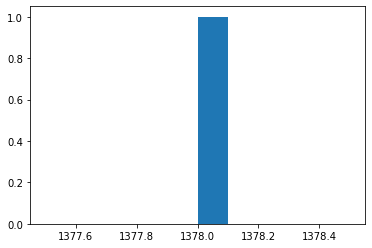

In [74]:
plt.hist(age_2017[1])